#### Importing libraries

In [202]:
# importing required packages
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy.stats import skew
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

#### Loading data

In [203]:
# mount drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [204]:
# reading the raw data (csv) using pandas
df = pd.read_csv("/content/gdrive/MyDrive/MCS/CSI5155/Assignment1/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [205]:
print("Distribution of 0's and 1's in the target (Complain):")
df.Complain.value_counts()

Distribution of 0's and 1's in the target (Complain):


0    2219
1      21
Name: Complain, dtype: int64

#### Data Cleaning

In [206]:
# checking if there's any object type column in the dataset (Education, Marital_Status, Dt_Cuustomer)
print("Shape of the data frame = ", df.shape, "\n")
df.info()

Shape of the data frame =  (2240, 29) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15

In [207]:
# calculating total null values per column
print("Total null values in the data: ", df.isnull().sum().sum(), "\n")
print("\nTotal rows with nulls having target as 1: ")
print(df[df['Complain'] == 1].isnull().sum())

Total null values in the data:  24 


Total rows with nulls having target as 1: 
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [208]:
# # dropping null rows as it's just 0.01% of the whole dataset & none of them has the minority class i.e. 1
# df.dropna(inplace=True)
# print("Total data points after removal of nulls = ", len(df))

In [209]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [210]:
# checking if NaN is present in dataset or not
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [211]:
# checking for duplicate rows if any
duplicate_rows = df[df.duplicated()]
print("Number of duplicated rows = ", len(duplicate_rows))

Number of duplicated rows =  0


In [212]:
# Finding unique values in columns (Z_Revenue, Z_CostContact have 1 unique value, so drop them)
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [213]:
df = df.drop(columns=["Z_CostContact", "Z_Revenue"], axis=1)

In [214]:
# checking for the categorical columns and their unique values
for column in df.select_dtypes(include='object').columns:
  if column == "Dt_Customer":
    continue
  print(f"{column}: \n{df[column].value_counts()}\n")

Education: 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Marital_Status: 
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



#### Feature Engineering

In [215]:
# Grouping Education levels into 3 categories
df['Education'] = df['Education'].replace({
    "Basic" : "Undergraduate",
    "Graduation" : "Graduate",
    "2n Cycle" : "Postgraduate",
    "Master" : "Postgraduate",
    "PhD" : "Postgraduate"
  })

# Renaming a few column names
df = df.rename(columns = {
    "MntWines" : "Wine",
    "MntFruits" : "Fruit",
    "MntMeatProducts" : "Meat",
    "MntFishProducts" : "Fish",
    "MntSweetProducts" : "Sweet",
    "MntGoldProds" : "Gold"
  })

# Upating multiple categories of "Marital_Status" by just 2 categories to reduce the classes imbalance
df["Marital_Status"] = df["Marital_Status"].replace({
    "Married" : "Relationship",
    "Together" : "Relationship",
    "Absurd" : "Single",
    "Widow" : "Single",
    "YOLO" : "Single",
    "Divorced" : "Single",
    "Single" : "Single"
  })

In [216]:
# Adding a new feature indicating total children living in the household
df['Children'] = df['Kidhome'] + df['Teenhome']

# Adding a new feature "Age"
df['Age'] = pd.to_datetime('now').year - df['Year_Birth']

# Adding a new feature "Accepted_Campaigns" to count total campaigns accepted by a customer
df['Accepted_Campaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Adding a new feature "Spendings" on eatables, wine, and gold
df['Spendings'] = df[['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']].sum(axis=1)

# Adding a new feature "Purchases" through web, catalog, store
df['Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

# Adding a new feature "Customer_Reg" to record number of days (till today) since enrolment
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customer_Reg'] = (pd.to_datetime('now') - df['Dt_Customer']).dt.days / 365.25

In [217]:
# Label encoding "Marital_Status" & "Education" column (it might be ordinal)
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [218]:
# Dropping irrelevant and redundant features
df = df.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wine,Fruit,Meat,Fish,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Accepted_Campaigns,Spendings,Purchases,Customer_Reg
0,0,2,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,0,67,0,1617,25,11.830253
1,0,2,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,2,70,0,27,6,9.514031
2,0,1,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,59,0,776,21,10.464066
3,0,1,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,1,40,0,53,8,9.349760
4,1,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,1,43,0,422,19,10.050650


In [219]:
df.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wine,Fruit,Meat,Fish,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,Accepted_Campaigns,Spendings,Purchases,Customer_Reg
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.520982,1.352679,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.064286,0.013393,0.009375,0.149107,0.950446,55.194196,0.297768,605.798214,14.862054,10.573698
std,0.545809,0.480706,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.245316,0.114976,0.096391,0.356274,0.751803,11.984069,0.678381,602.249288,7.677173,0.635811
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,5.000000,0.000000,9.171800
25%,0.000000,1.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,68.750000,8.000000,10.104723
50%,0.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,54.000000,0.000000,396.000000,15.000000,10.576318
75%,1.000000,2.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,65.000000,0.000000,1045.500000,21.000000,11.047912
max,2.000000,2.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,131.000000,4.000000,2525.000000,44.000000,12.082136


#### Train Test Split

In [220]:
y = df['Complain']
X = df.drop('Complain', axis=1)

In [221]:
# applying train-test split to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Data Analysis

Number of people who complained in past 2 years =  17
Number of people who didn't complain in past 2 years =  1775


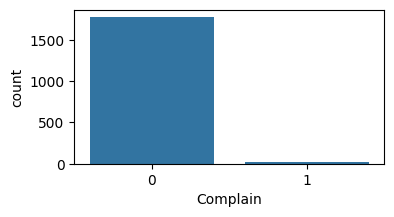

In [222]:
# Print the number of customers who complained and didn't complain
complained = y_train.value_counts()[1]
not_complained = y_train.value_counts()[0]

print("Number of people who complained in past 2 years = ", complained)
print("Number of people who didn't complain in past 2 years = ", not_complained)

plt.figure(figsize=(4, 2))
ax = sns.countplot(x=y_train)
plt.show()

In [223]:
def plot_feature_distribution(x, y, feature: str):
  plt.figure(figsize=(6, 3))
  sns.histplot(x=x[feature], hue=y, element="step", common_norm=False, palette='magma', kde=True)
  plt.show()

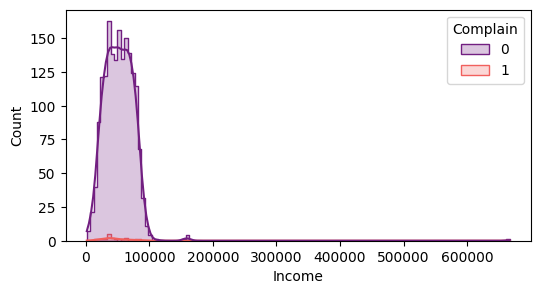

In [224]:
# plot for "Income"
plot_feature_distribution(X_train, y_train, 'Income')

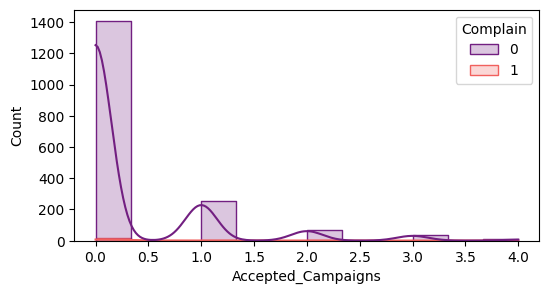

In [225]:
# plot for "Accepted_Campaigns"
plot_feature_distribution(X_train, y_train, 'Accepted_Campaigns')

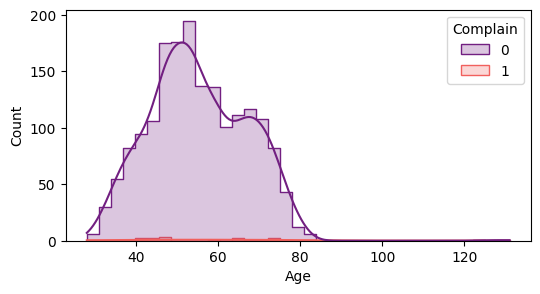

In [226]:
# plot for "Age" distribution
plot_feature_distribution(X_train, y_train, 'Age')

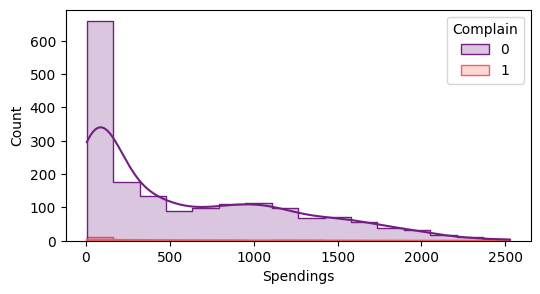

In [227]:
# plot for "Age" distribution
plot_feature_distribution(X_train, y_train, 'Spendings')

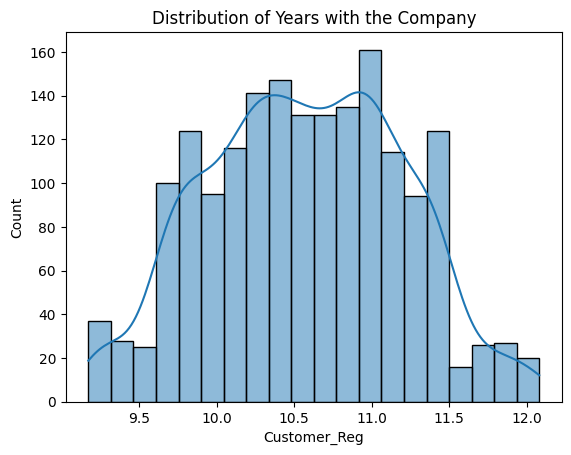

In [228]:
# plot for distribution of customer's association with the comapny
sns.histplot(X_train['Customer_Reg'], kde=True)
plt.title('Distribution of Years with the Company')
plt.show()

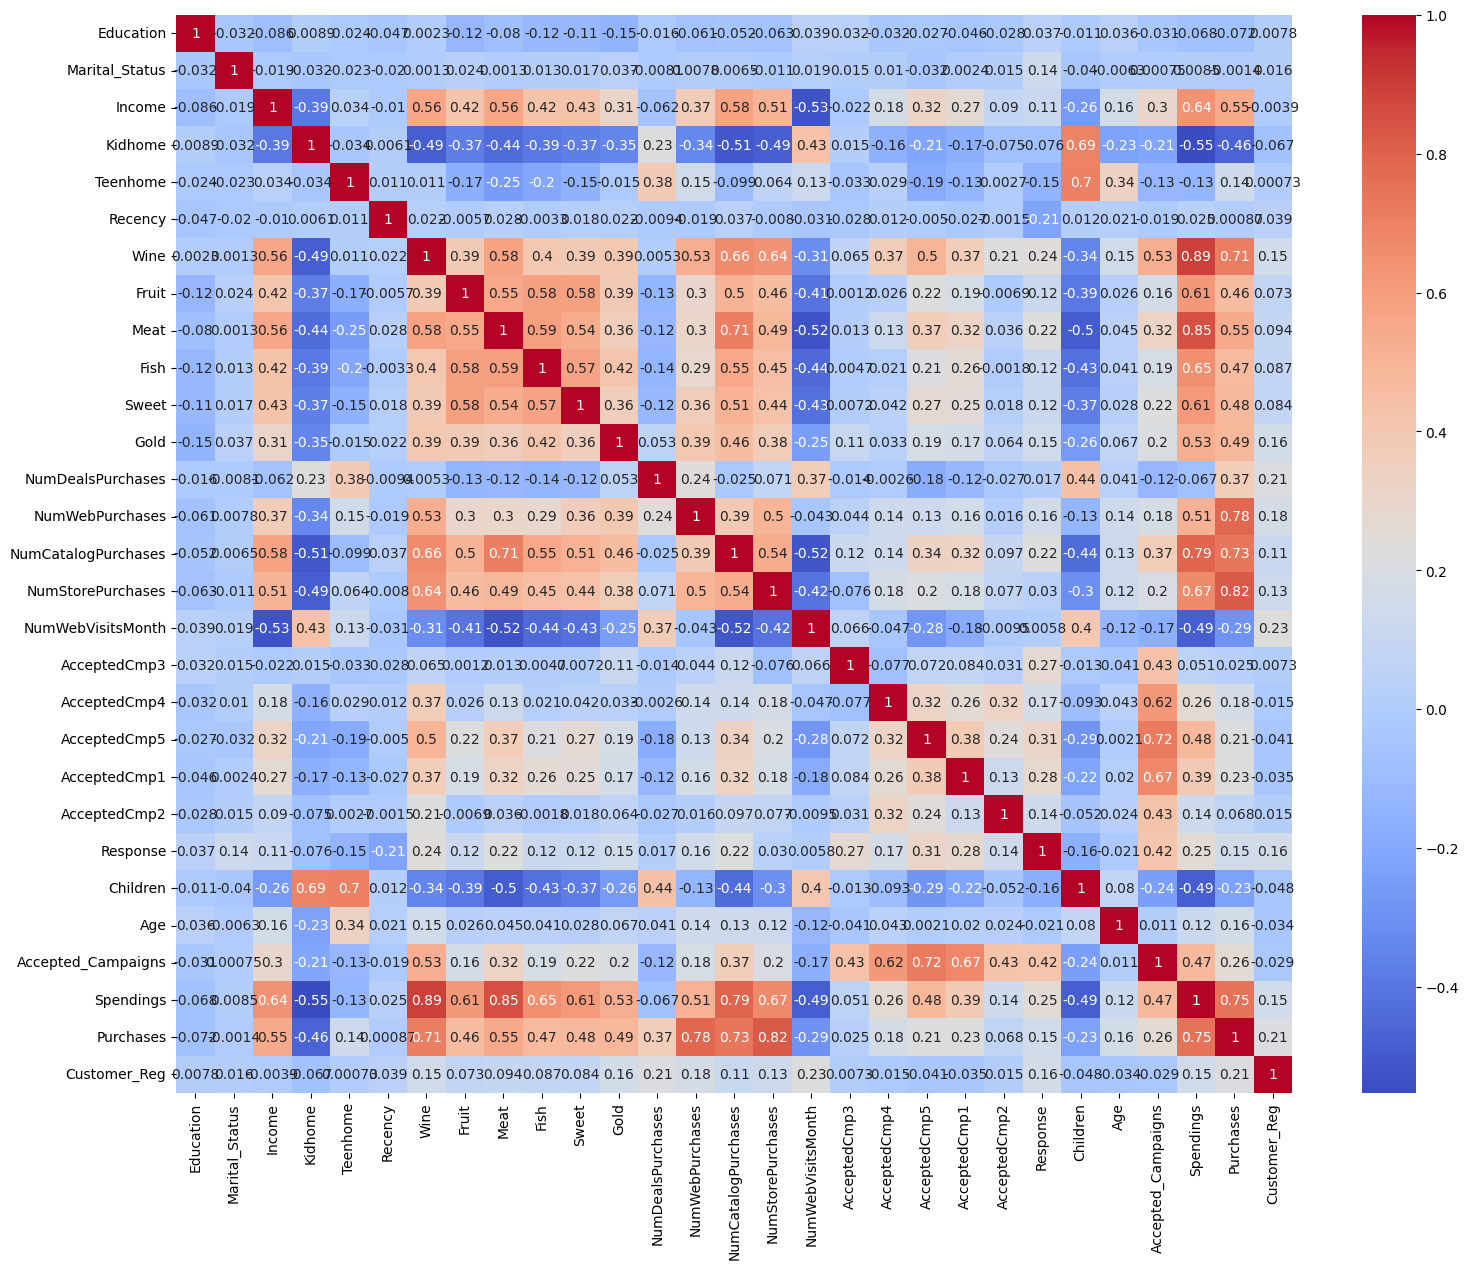

In [229]:
# correlation matrix heatmap
plt.figure(figsize=(18, 14))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [230]:
trainSkew = X_train.skew()
print((trainSkew.sort_values()))

Customer_Reg           0.003160
Recency                0.006732
Purchases              0.244658
NumWebVisitsMonth      0.321257
Teenhome               0.410076
Education              0.411838
Children               0.416853
Age                    0.417041
Marital_Status         0.607016
Kidhome                0.658685
NumStorePurchases      0.716482
Spendings              0.876102
Wine                   1.189970
NumWebPurchases        1.376211
NumCatalogPurchases    1.554758
Gold                   1.880478
Fish                   1.929985
Meat                   2.003422
Response               2.029981
Fruit                  2.084218
Sweet                  2.143197
NumDealsPurchases      2.419259
Accepted_Campaigns     2.690338
AcceptedCmp3           3.175818
AcceptedCmp5           3.282727
AcceptedCmp4           3.485727
AcceptedCmp1           3.503924
Income                 7.711446
AcceptedCmp2           9.564498
dtype: float64


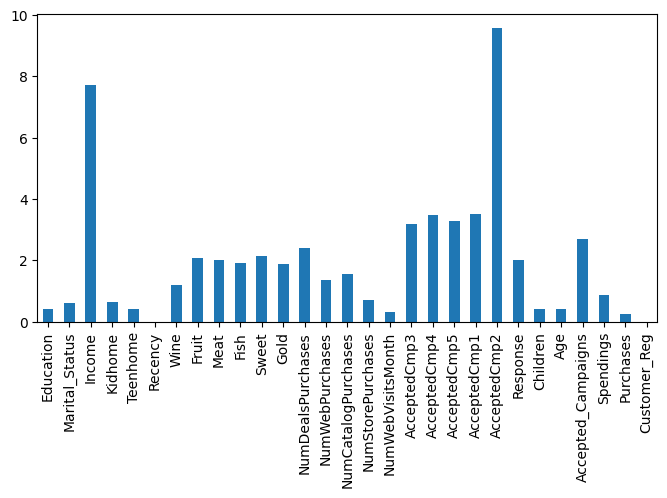

In [231]:
# plotting skewness in the dataset
plt.figure(figsize=(8, 4))
trainSkew.plot(kind='bar')
plt.show()

#### Feature Transformations

In [232]:
# removing outlier causing skewness
y_train = y_train[X_train["Income"] < 600000]
X_train = X_train[(X_train["Income"] < 600000)]
# skewness removed
X_train.skew().sort_values()

Customer_Reg           0.004125
Recency                0.005634
Purchases              0.243865
NumWebVisitsMonth      0.321636
Income                 0.322079
Teenhome               0.409152
Education              0.410917
Age                    0.416120
Children               0.416822
Marital_Status         0.606112
Kidhome                0.660183
NumStorePurchases      0.715640
Spendings              0.875356
Wine                   1.189316
NumWebPurchases        1.375381
NumCatalogPurchases    1.553900
Gold                   1.879651
Fish                   1.929101
Meat                   2.002659
Response               2.029052
Fruit                  2.083299
Sweet                  2.142406
NumDealsPurchases      2.421109
Accepted_Campaigns     2.689335
AcceptedCmp3           3.174685
AcceptedCmp5           3.281571
AcceptedCmp4           3.484527
AcceptedCmp1           3.502720
AcceptedCmp2           9.561746
dtype: float64

In [233]:
# Not sure if the data distribution is perfectly normal/ gaussian, so using MinMax not StandardScaler
scaler = MinMaxScaler()

# Fit and transform on training data
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test_normalized = scaler.transform(X_test)

In [234]:
X_train = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test = pd.DataFrame(X_test_normalized, columns=X_test.columns)

In [235]:
# remove highly correlated features using Pearson's correlation (threshold = 0.7)
def checkCorrelation(df, threshold):
  cols = set()
  corrMatrix = df.corr()
  for i in range(len(corrMatrix.columns)):
    for j in range(i):
      if corrMatrix.iloc[i, j] > threshold:
        cols.add(corrMatrix.columns[i])
  return cols

In [236]:
features = checkCorrelation(X_train, 0.8)
print(features)

{'Purchases', 'Spendings'}


In [237]:
X_train = X_train.drop(features, axis = 1)
X_test = X_test.drop(features, axis=1)

In [238]:
X_train.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wine,Fruit,Meat,Fish,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Children,Age,Accepted_Campaigns,Customer_Reg
0,0.0,0.5,0.176533,0.0,0.0,0.191919,0.001340,0.030151,0.017263,0.050193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058252,0.00,0.457197
1,0.0,0.5,0.334257,0.5,0.0,0.212121,0.159411,0.577889,0.132552,0.652510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.116505,0.00,0.540922
2,0.0,1.0,0.497470,0.0,0.0,0.696970,0.243804,0.201005,0.262022,0.610039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.262136,0.00,0.299153
3,0.0,0.5,0.505847,0.0,0.0,0.181818,0.573342,0.306533,0.351418,0.154440,...,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.300971,0.25,0.604892
4,0.0,0.5,0.361144,0.0,0.5,0.969697,0.077026,0.135678,0.027127,0.015444,...,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.300971,0.00,0.996237


#### Feature Selection

In [239]:
def plotScores(scores, test):
  plt.figure(figsize=(8, 4))
  plt.plot(X_train.columns, scores, marker='o', linestyle='-')
  plt.xticks(rotation='vertical')
  plt.xlabel('Features')
  plt.ylabel(f'{test} Score')
  plt.title(f'{test} Scores for Each Feature wrt y')
  plt.grid(True)
  plt.show()

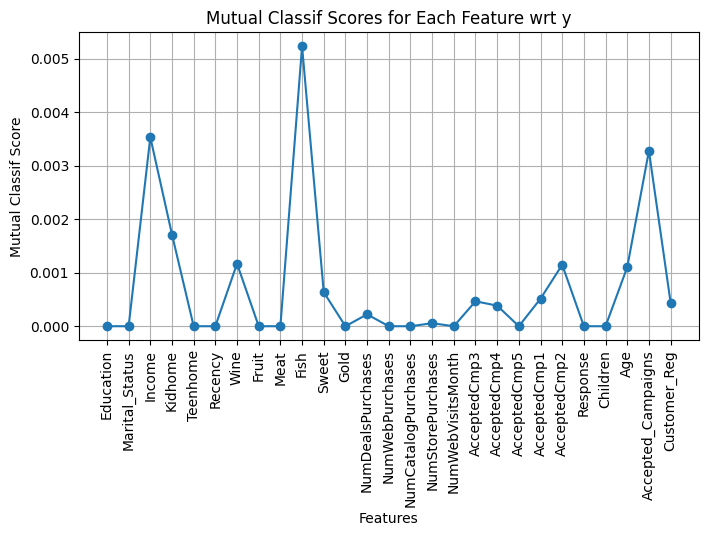

In [240]:
k = 10
# mutual classification score
fs = SelectKBest(score_func= mutual_info_classif, k=k)
fs.fit_transform(X_train, y_train)
plotScores(fs.scores_, 'Mutual Classif')

In [241]:
# Get the scores and feature indices
scores = fs.scores_
indices = fs.get_support(indices=True)

for i in indices:
    print(f"{X_train.columns[i]}: {scores[i]:.4f}")

# Print the indices of selected features
print("\nSelected feature indices:", indices)

Income: 0.0035
Kidhome: 0.0017
Wine: 0.0012
Fish: 0.0052
Sweet: 0.0006
AcceptedCmp3: 0.0005
AcceptedCmp1: 0.0005
AcceptedCmp2: 0.0011
Age: 0.0011
Accepted_Campaigns: 0.0033

Selected feature indices: [ 2  3  6  9 10 17 20 21 24 25]


In [242]:
# applying best k features to training and testing set
X_test = X_test.iloc[:, indices]
X_train = X_train.iloc[:, indices]

## PART A

In [243]:
cols = ['Training Data', 'Precision', 'Recall', 'F1-score', 'Accuracy']
performance_arr = []
# decision tree, random forest, Gradient Boosting Ensemble, SVM, MLP, kNN
for i in range(6):
  performance_arr.append(pd.DataFrame(columns=cols))


def addToPerformanceDf(idx, p, r, f1, a, data='Original'):
  '''
    Add classification evaluation results to the table
  '''
  pdf = performance_arr[idx]
  row = {'Training Data': data, 'Precision': f'{p:.2f}', 'Recall': f'{r:.2f}', 'F1-score': f'{f1:.2f}', 'Accuracy': f'{a:.2f}'}
  pdf.loc[len(pdf)] = row
  performance_arr[idx] = pdf

In [244]:
class ModelBase:
  def __init__(self, model, xtrain, xtest, ytrain, ytest):
    self.__xtrain = xtrain
    self.__ytrain = ytrain
    self.__xtest = xtest
    self.__ytest = ytest
    self.__model = model

  def train(self):
    '''
      Fitting/ training the model on xtrain and ytrain
    '''
    self.__model.fit(self.__xtrain, self.__ytrain)


  def predict(self):
    '''
      Prediciting target values (ypred) on xtest
    '''
    self.__ypred = self.__model.predict(self.__xtest)
    return self.__ypred


  def plot_roc_curve(self):
    '''
      Plot ROC curve
    '''
    roc_auc, fpr, tpr = self.calculate_roc()
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


  def calculate_roc(self):
    '''
      Get predicted probabilities for the positive class and compute ROC curve and area under the curve (AUC)
    '''
    y_prob = self.__model.predict_proba(self.__xtest)[:, 1]
    fpr, tpr, thresholds = roc_curve(self.__ytest, y_prob)
    roc_auc = auc(fpr, tpr)
    return roc_auc, fpr, tpr


  def plot_confusion_matrix(self):
    '''
      Plot confusion Matrix
    '''
    conf_matrix = confusion_matrix(self.__ytest, self.__ypred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
    # Add labels
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


  def model_evaluation(self):
    '''
      Compute recall, precision, accuracy, f1-score, and plot confusion matrix
    '''
    recall = recall_score(self.__ytest, self.__ypred)
    precision = precision_score(self.__ytest, self.__ypred)
    accuracy = accuracy_score(self.__ytest, self.__ypred)
    f1 = f1_score(self.__ytest, self.__ypred)
    print(f"Precision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}\nAccuracy: {accuracy:.2f}\n")
    print("Classification Report:\n", classification_report(self.__ytest, self.__ypred))
    self.plot_confusion_matrix()
    return recall, precision, f1, accuracy


  def param_tuning(self, param_grid, splits=10):
    '''
      Using GridSearch along with Stratified k-cross validation to do hyperparameter tuning
    '''
    cv = StratifiedKFold(n_splits=splits, shuffle=True, random_state=42)
    # Create a GridSearchCV object
    gs = GridSearchCV(estimator=self.__model, param_grid=param_grid, cv=cv, scoring=make_scorer(f1_score))
    # Fit the GridSearchCV object to the xtrain and ytrain
    gs.fit(self.__xtrain, self.__ytrain)
    self.__model = gs.best_estimator_
    return gs.best_params_, gs.best_score_

#### Single Decision Tree

In [245]:
dt_model_1 = ModelBase(DecisionTreeClassifier(random_state=36), X_train, X_test, y_train, y_test)

In [246]:
# Define the parameter grid for Decision Tree Classifier to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': range(2, 10),
    'class_weight': [None, 'balanced'],
}

best_params, best_score = dt_model_1.param_tuning(param_grid)
print("Best params: ", best_params)

Best params:  {'class_weight': 'balanced', 'criterion': 'entropy', 'min_samples_split': 4}


Precision: 0.29
Recall: 0.50
F1-score: 0.36
Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       444
           1       0.29      0.50      0.36         4

    accuracy                           0.98       448
   macro avg       0.64      0.74      0.68       448
weighted avg       0.99      0.98      0.99       448



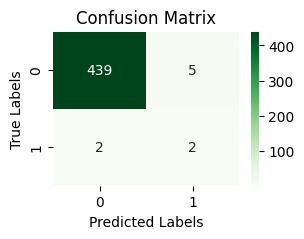

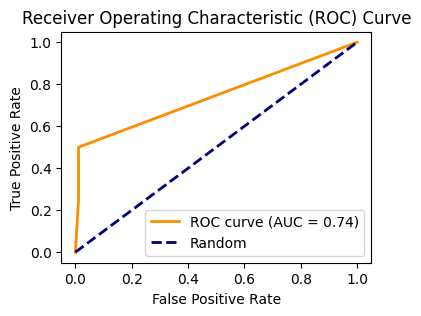

In [247]:
# this is our best model now (ModelBase internally assigns best model to the current model)
dt_model_1.train()
# make predictions
y_pred = dt_model_1.predict()
# evaluate the model
r, p, f1, a = dt_model_1.model_evaluation()
# plot roc curve
dt_model_1.plot_roc_curve()

In [248]:
addToPerformanceDf(0, p, r, f1, a)

#### Random Forest Classifier

In [249]:
rf_model_1 = ModelBase(RandomForestClassifier(random_state=56), X_train, X_test, y_train, y_test)

In [250]:
param_grid = {
    'n_estimators': [2, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
  }

best_params, best_score = rf_model_1.param_tuning(param_grid)
print("Best params: ", best_params)

Best params:  {'class_weight': None, 'criterion': 'gini', 'n_estimators': 2}


Precision: 1.00
Recall: 0.25
F1-score: 0.40
Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       444
           1       1.00      0.25      0.40         4

    accuracy                           0.99       448
   macro avg       1.00      0.62      0.70       448
weighted avg       0.99      0.99      0.99       448



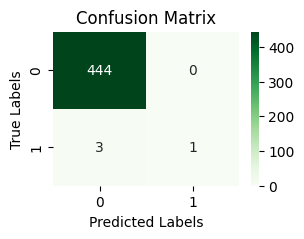

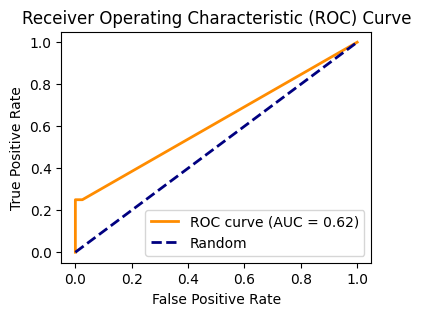

In [251]:
# train, predict, evaluate
rf_model_1.train()
y_pred = rf_model_1.predict()
r, p, f1, a = rf_model_1.model_evaluation()
# plot ROC curve
rf_model_1.plot_roc_curve()

In [252]:
addToPerformanceDf(1, p, r, f1, a)

#### SVM (Support Vector Machine)

In [253]:
svm_model_1 = ModelBase(SVC(probability=True), X_train, X_test, y_train, y_test)

In [254]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf','poly'],
    'degree': [2, 5, 10],
    'class_weight': [None, 'balanced']
}

best_params, best_score = svm_model_1.param_tuning(param_grid)
print("Best params: ", best_params)

Best params:  {'C': 100, 'class_weight': 'balanced', 'degree': 2, 'kernel': 'rbf'}


Precision: 0.01
Recall: 0.25
F1-score: 0.03
Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91       444
           1       0.01      0.25      0.03         4

    accuracy                           0.84       448
   macro avg       0.50      0.55      0.47       448
weighted avg       0.98      0.84      0.90       448



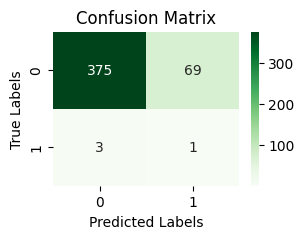

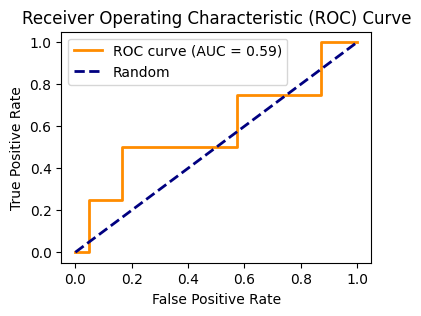

In [255]:
# train, predict, evaluate
svm_model_1.train()
y_pred = svm_model_1.predict()
r, p, f1, a = svm_model_1.model_evaluation()
# plot ROC curve
svm_model_1.plot_roc_curve()

In [256]:
addToPerformanceDf(2, p, r, f1, a)

#### Gradient Boosting Ensemble

In [257]:
# gradient boosting ensemble classifier
gbe_model_1 = ModelBase(GradientBoostingClassifier(), X_train, X_test, y_train, y_test)

In [258]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.1, 0.5, 1],
}

best_params, best_score = gbe_model_1.param_tuning(param_grid)
print("Best params: ", best_params)

Best params:  {'learning_rate': 0.2, 'n_estimators': 50, 'subsample': 0.5}


Precision: 0.00
Recall: 0.00
F1-score: 0.00
Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       444
           1       0.00      0.00      0.00         4

    accuracy                           0.97       448
   macro avg       0.50      0.49      0.49       448
weighted avg       0.98      0.97      0.98       448



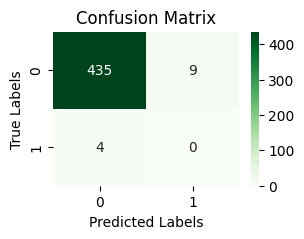

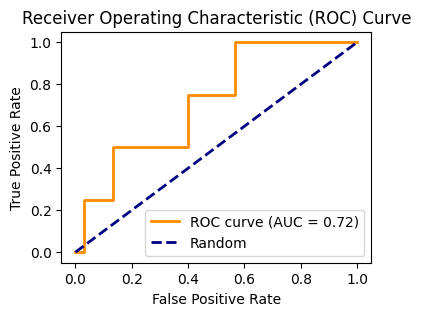

In [259]:
# train, predict, evaluate
gbe_model_1.train()
y_pred = gbe_model_1.predict()
r, p, f1, a = gbe_model_1.model_evaluation()
# plot the roc curve
gbe_model_1.plot_roc_curve()

In [260]:
addToPerformanceDf(3, p, r, f1, a)

#### MLP (Multi Layer Perceptron)

In [261]:
mlp_model_1 = ModelBase(MLPClassifier(), X_train, X_test, y_train, y_test)

In [262]:
param_grid = {
    'hidden_layer_sizes': [(100, ), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
best_params, best_score = mlp_model_1.param_tuning(param_grid)
print("Best params: ", best_params)

Best params:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}


Precision: 0.00
Recall: 0.00
F1-score: 0.00
Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       444
           1       0.00      0.00      0.00         4

    accuracy                           0.99       448
   macro avg       0.50      0.50      0.50       448
weighted avg       0.98      0.99      0.99       448



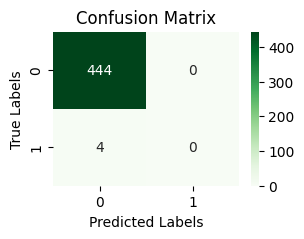

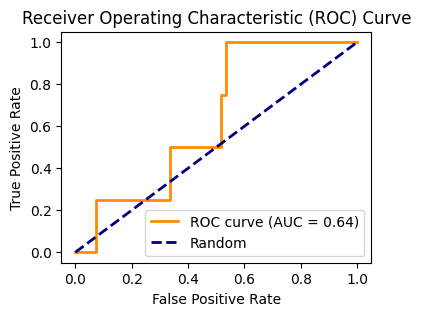

In [263]:
# train, predict, evaluate
mlp_model_1.train()
y_pred = mlp_model_1.predict()
r, p, f1, a = mlp_model_1.model_evaluation()
# plot the roc curve
mlp_model_1.plot_roc_curve()

In [264]:
addToPerformanceDf(4, p, r, f1, a)

#### kNN (k-Nearest Neighbors)

In [265]:
knn_model_1 = ModelBase(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

In [266]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [1, 3, 6, 9],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']
}

In [267]:
best_params, best_score = knn_model_1.param_tuning(param_grid)
print("Best params: ", best_params)

Best params:  {'metric': 'manhattan', 'n_neighbors': 1, 'p': 1}


Precision: 0.20
Recall: 0.25
F1-score: 0.22
Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       444
           1       0.20      0.25      0.22         4

    accuracy                           0.98       448
   macro avg       0.60      0.62      0.61       448
weighted avg       0.99      0.98      0.99       448



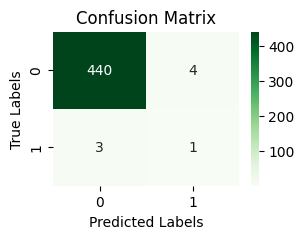

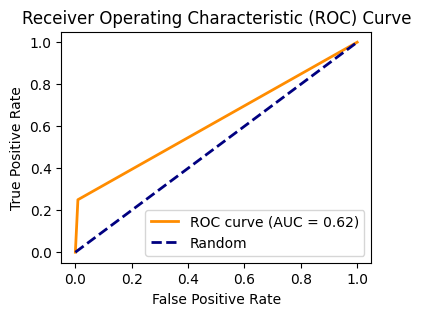

In [268]:
# train, predict, evaluate
knn_model_1.train()
y_pred = knn_model_1.predict()
r, p, f1, a = knn_model_1.model_evaluation()
# plot the roc curve
knn_model_1.plot_roc_curve()

In [269]:
addToPerformanceDf(5, p, r, f1, a)

## PART B

#### Undersampling

In [270]:
# Instantiate RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=49)

# Fit and apply the random under-sampling
X_us, y_us = rus.fit_resample(X_train, y_train)

In [271]:
print("Undersampled X shape = ", X_us.shape)
print("Undersampled y shape = ", y_us.shape)

Undersampled X shape =  (51, 10)
Undersampled y shape =  (51,)


In [272]:
dt_model_2 = ModelBase(DecisionTreeClassifier(class_weight='balanced', criterion='entropy', min_samples_split=4), X_us, X_test, y_us, y_test)
dt_model_2.train()
y_pred = dt_model_2.predict()

In [273]:
rf_model_2 = ModelBase(RandomForestClassifier(class_weight=None, criterion='gini', n_estimators=2), X_us, X_test, y_us, y_test)
rf_model_2.train()
y_pred = rf_model_2.predict()

In [281]:
svm_model_2 = ModelBase(SVC(probability=True, C=100, class_weight='balanced', degree=2, kernel='rbf'), X_us, X_test, y_us, y_test)
svm_model_2.train()
y_pred = svm_model_2.predict()

In [275]:
gbe_model_2 = ModelBase(GradientBoostingClassifier(learning_rate=0.2, n_estimators=50, subsample=0.5), X_us, X_test, y_us, y_test)
gbe_model_2.train()
y_pred = gbe_model_2.predict()

In [276]:
mlp_model_2 = ModelBase(MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,)), X_us, X_test, y_us, y_test)
mlp_model_2.train()
y_pred = mlp_model_2.predict()

In [277]:
knn_model_2 = ModelBase(KNeighborsClassifier(metric='manhattan', n_neighbors=1, p=1), X_us, X_test, y_us, y_test)
knn_model_2.train()
y_pred = knn_model_2.predict()

Decision Tree Evaluation: 



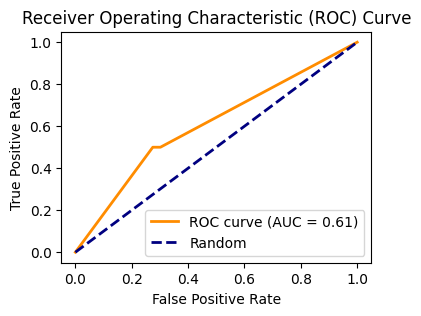

Precision: 0.01
Recall: 0.50
F1-score: 0.03
Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82       444
           1       0.01      0.50      0.03         4

    accuracy                           0.70       448
   macro avg       0.50      0.60      0.42       448
weighted avg       0.98      0.70      0.81       448



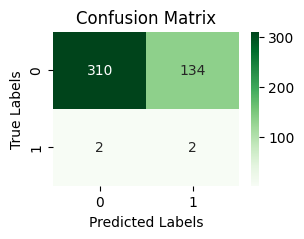

In [278]:
print("Decision Tree Evaluation: \n")
dt_model_2.plot_roc_curve()
r, p, f1, a = dt_model_2.model_evaluation()
addToPerformanceDf(0, p, r, f1, a, 'Undersampled')

Random Forest Evaluation: 

Precision: 0.02
Recall: 0.50
F1-score: 0.04
Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88       444
           1       0.02      0.50      0.04         4

    accuracy                           0.79       448
   macro avg       0.51      0.65      0.46       448
weighted avg       0.99      0.79      0.88       448



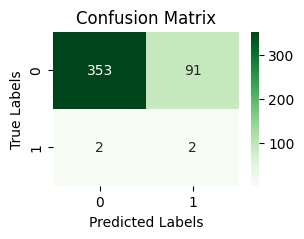

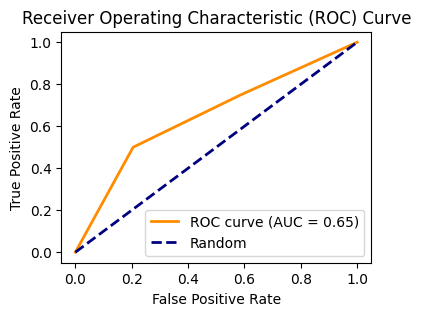

In [279]:
print("Random Forest Evaluation: \n")
r, p, f1, a = rf_model_2.model_evaluation()
rf_model_2.plot_roc_curve()
addToPerformanceDf(1, p, r, f1, a, 'Undersampled')

SVM Evaluation: 

Precision: 0.01
Recall: 0.50
F1-score: 0.01
Accuracy: 0.38

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.38      0.55       444
           1       0.01      0.50      0.01         4

    accuracy                           0.38       448
   macro avg       0.50      0.44      0.28       448
weighted avg       0.98      0.38      0.55       448



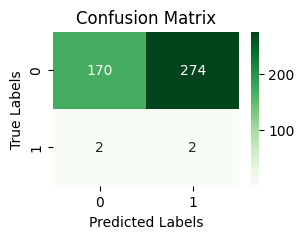

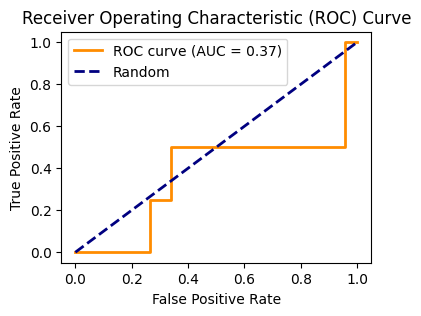

In [282]:
print("SVM Evaluation: \n")
r, p, f1, a = svm_model_2.model_evaluation()
svm_model_2.plot_roc_curve()
addToPerformanceDf(2, p, r, f1, a, 'Undersampled')

Gradient Boosting Ensemble Evaluation: 

Precision: 0.01
Recall: 0.25
F1-score: 0.02
Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.89       444
           1       0.01      0.25      0.02         4

    accuracy                           0.79       448
   macro avg       0.50      0.52      0.45       448
weighted avg       0.98      0.79      0.88       448



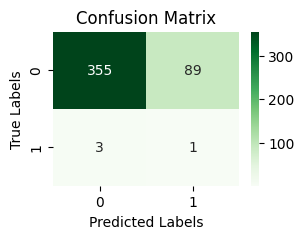

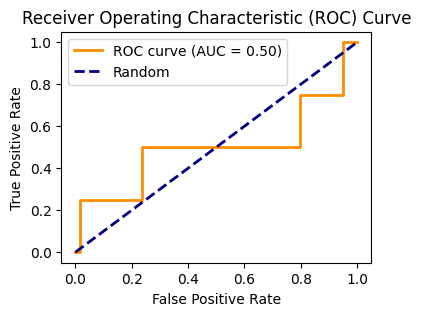

In [283]:
print("Gradient Boosting Ensemble Evaluation: \n")
r, p, f1, a = gbe_model_2.model_evaluation()
gbe_model_2.plot_roc_curve()
addToPerformanceDf(3, p, r, f1, a, 'Undersampled')

MLP Evaluation: 

Precision: 0.02
Recall: 0.25
F1-score: 0.04
Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       444
           1       0.02      0.25      0.04         4

    accuracy                           0.88       448
   macro avg       0.51      0.57      0.48       448
weighted avg       0.98      0.88      0.93       448



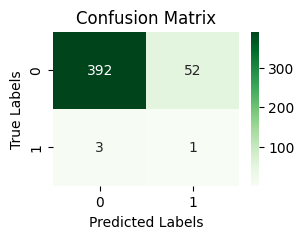

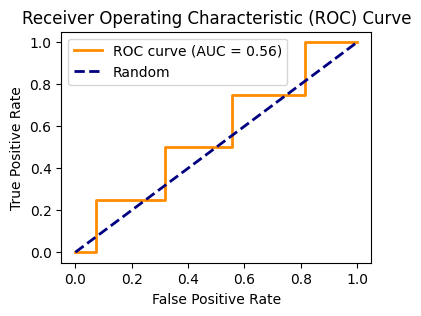

In [284]:
print("MLP Evaluation: \n")
r, p, f1, a = mlp_model_2.model_evaluation()
mlp_model_2.plot_roc_curve()
addToPerformanceDf(4, p, r, f1, a, 'Undersampled')

k-NN Evaluation: 

Precision: 0.01
Recall: 0.25
F1-score: 0.01
Accuracy: 0.67

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.80       444
           1       0.01      0.25      0.01         4

    accuracy                           0.67       448
   macro avg       0.50      0.46      0.41       448
weighted avg       0.98      0.67      0.80       448



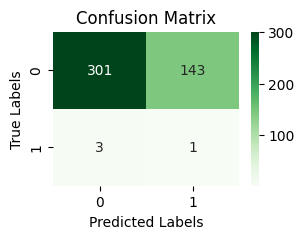

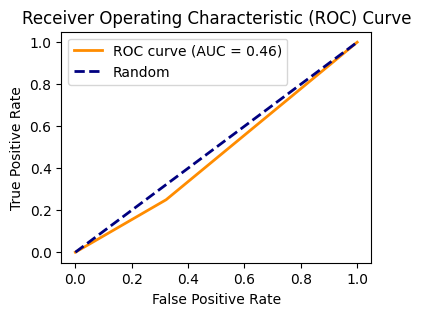

In [285]:
print("k-NN Evaluation: \n")
r, p, f1, a = knn_model_2.model_evaluation()
knn_model_2.plot_roc_curve()
addToPerformanceDf(5, p, r, f1, a, 'Undersampled')

#### Oversampling

In [286]:
# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=54)

# Fit and apply SMOTE over-sampling
X_os, y_os = smote.fit_resample(X_train, y_train)

In [287]:
print("Oversampled X shape = ", X_os.shape)
print("Oversampled y shape = ", y_os.shape)

Oversampled X shape =  (3548, 10)
Oversampled y shape =  (3548,)


In [288]:
dt_model_3 = ModelBase(DecisionTreeClassifier(class_weight='balanced', criterion='entropy', min_samples_split=4), X_os, X_test, y_os, y_test)
dt_model_3.train()
y_pred = dt_model_3.predict()

In [289]:
rf_model_3 = ModelBase(RandomForestClassifier(class_weight=None, criterion='gini', n_estimators=2), X_os, X_test, y_os, y_test)
rf_model_3.train()
y_pred = rf_model_3.predict()

In [290]:
svm_model_3 = ModelBase(SVC(probability=True, C=100, class_weight='balanced', degree=2, kernel='rbf'), X_os, X_test, y_os, y_test)
svm_model_3.train()
y_pred = svm_model_3.predict()

In [291]:
gbe_model_3 = ModelBase(GradientBoostingClassifier(learning_rate=0.2, n_estimators=50, subsample=0.5), X_os, X_test, y_os, y_test)
gbe_model_3.train()
y_pred = gbe_model_3.predict()

In [292]:
mlp_model_3 = ModelBase(MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,)), X_os, X_test, y_os, y_test)
mlp_model_3.train()
y_pred = mlp_model_3.predict()

In [293]:
knn_model_3 = ModelBase(KNeighborsClassifier(metric='manhattan', n_neighbors=1, p=1), X_os, X_test, y_os, y_test)
knn_model_3.train()
y_pred = knn_model_3.predict()

Decision Tree Evaluation: 



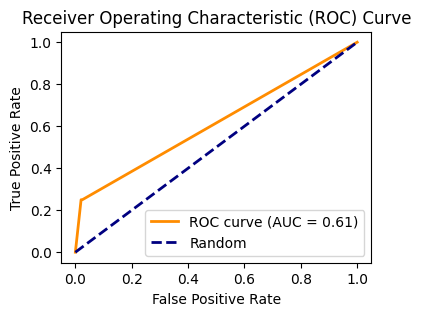

Precision: 0.10
Recall: 0.25
F1-score: 0.14
Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       444
           1       0.10      0.25      0.14         4

    accuracy                           0.97       448
   macro avg       0.55      0.61      0.56       448
weighted avg       0.99      0.97      0.98       448



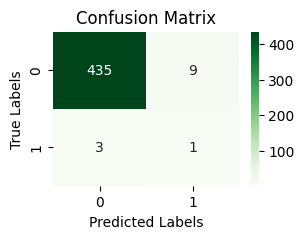

In [294]:
print("Decision Tree Evaluation: \n")
dt_model_3.plot_roc_curve()
r, p, f1, a = dt_model_3.model_evaluation()
addToPerformanceDf(0, p, r, f1, a, 'Oversampled')

Random Forest Evaluation: 

Precision: 0.14
Recall: 0.25
F1-score: 0.18
Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       444
           1       0.14      0.25      0.18         4

    accuracy                           0.98       448
   macro avg       0.57      0.62      0.59       448
weighted avg       0.99      0.98      0.98       448



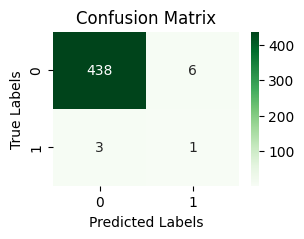

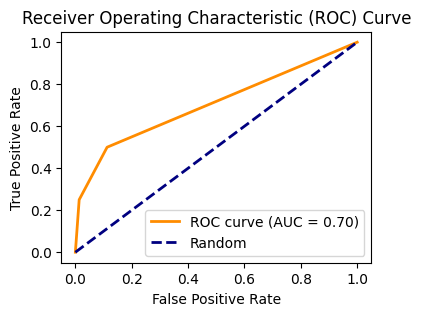

In [295]:
print("Random Forest Evaluation: \n")
r, p, f1, a = rf_model_3.model_evaluation()
rf_model_3.plot_roc_curve()
addToPerformanceDf(1, p, r, f1, a, 'Oversampled')

SVM Evaluation: 

Precision: 0.01
Recall: 0.25
F1-score: 0.02
Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90       444
           1       0.01      0.25      0.02         4

    accuracy                           0.81       448
   macro avg       0.50      0.53      0.46       448
weighted avg       0.98      0.81      0.89       448



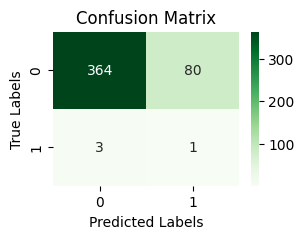

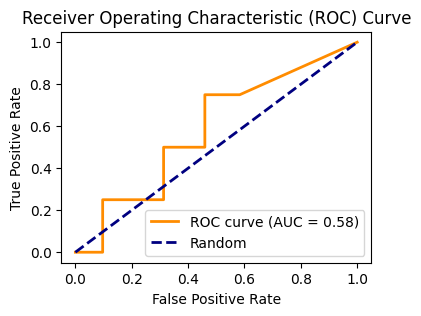

In [296]:
print("SVM Evaluation: \n")
r, p, f1, a = svm_model_3.model_evaluation()
svm_model_3.plot_roc_curve()
addToPerformanceDf(2, p, r, f1, a, 'Oversampled')

Gradient Boosting Ensemble Evaluation: 

Precision: 0.03
Recall: 0.25
F1-score: 0.05
Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       444
           1       0.03      0.25      0.05         4

    accuracy                           0.92       448
   macro avg       0.51      0.59      0.51       448
weighted avg       0.98      0.92      0.95       448



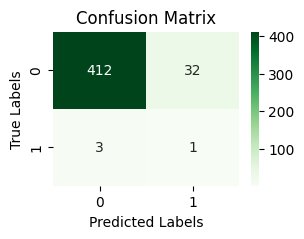

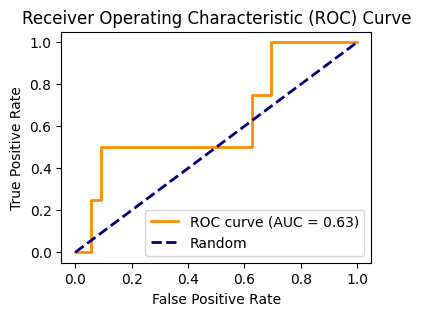

In [297]:
print("Gradient Boosting Ensemble Evaluation: \n")
r, p, f1, a = gbe_model_3.model_evaluation()
gbe_model_3.plot_roc_curve()
addToPerformanceDf(3, p, r, f1, a, 'Oversampled')

MLP Evaluation: 

Precision: 0.01
Recall: 0.25
F1-score: 0.02
Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87       444
           1       0.01      0.25      0.02         4

    accuracy                           0.77       448
   macro avg       0.50      0.51      0.45       448
weighted avg       0.98      0.77      0.86       448



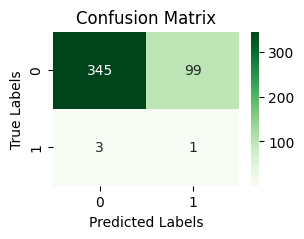

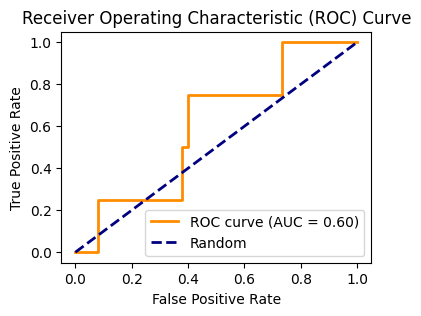

In [298]:
print("MLP Evaluation: \n")
r, p, f1, a = mlp_model_3.model_evaluation()
mlp_model_3.plot_roc_curve()
addToPerformanceDf(4, p, r, f1, a, 'Oversampled')

k-NN Evaluation: 

Precision: 0.03
Recall: 0.25
F1-score: 0.05
Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       444
           1       0.03      0.25      0.05         4

    accuracy                           0.91       448
   macro avg       0.51      0.58      0.50       448
weighted avg       0.98      0.91      0.94       448



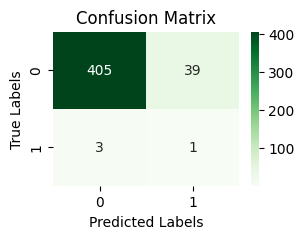

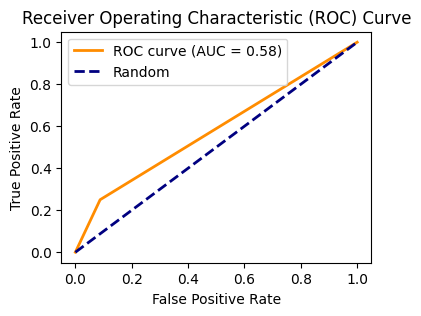

In [299]:
print("k-NN Evaluation: \n")
r, p, f1, a = knn_model_3.model_evaluation()
knn_model_3.plot_roc_curve()
addToPerformanceDf(5, p, r, f1, a, 'Oversampled')

## Results

In [300]:
print("Single Decision Tree Results:\n")
performance_arr[0].head()

Single Decision Tree Results:



,Training Data,Precision,Recall,F1-score,Accuracy
0,Original,0.29,0.50,0.36,0.98
1,Undersampled,0.01,0.50,0.03,0.70
2,Oversampled,0.10,0.25,0.14,0.97


In [301]:
print("Random Forest Results:\n")
performance_arr[1].head()

Random Forest Results:



,Training Data,Precision,Recall,F1-score,Accuracy
0,Original,1.00,0.25,0.40,0.99
1,Undersampled,0.02,0.50,0.04,0.79
2,Oversampled,0.14,0.25,0.18,0.98


In [302]:
print("SVM Results:\n")
performance_arr[2].head()

SVM Results:



,Training Data,Precision,Recall,F1-score,Accuracy
0,Original,0.01,0.25,0.03,0.84
1,Undersampled,0.01,0.50,0.01,0.38
2,Oversampled,0.01,0.25,0.02,0.81


In [303]:
print("Gradient Boosting Ensemble Results:\n")
performance_arr[3].head()

Gradient Boosting Ensemble Results:



,Training Data,Precision,Recall,F1-score,Accuracy
0,Original,0.00,0.00,0.00,0.97
1,Undersampled,0.01,0.25,0.02,0.79
2,Oversampled,0.03,0.25,0.05,0.92


In [304]:
print("MLP Results:\n")
performance_arr[4].head()

MLP Results:



,Training Data,Precision,Recall,F1-score,Accuracy
0,Original,0.00,0.00,0.00,0.99
1,Undersampled,0.02,0.25,0.04,0.88
2,Oversampled,0.01,0.25,0.02,0.77


In [305]:
print("k-NN Results:\n")
performance_arr[5].head()

k-NN Results:



,Training Data,Precision,Recall,F1-score,Accuracy
0,Original,0.20,0.25,0.22,0.98
1,Undersampled,0.01,0.25,0.01,0.67
2,Oversampled,0.03,0.25,0.05,0.91
